# CHE1147 Data Mining in Engineering
### Assignment 4 Jialin Shang 1005086256
## 1. Chemical composition of pottery
### 1.1 Data exploration with PCA
1. Import and view the data. How many columns do you have? Which columns will you use in your PCA?

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import MaxAbsScaler, StandardScaler 

In [2]:
# Import datasets
p = pd.read_csv("Pottery.csv")
p.head()

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20


In [3]:
# Find the number of columns of the dataset and the columns for PCA
print('The number of columns in the dataset is:', p.shape[1])
print('For PCA, we will use the columns: AI, Fe, Mg, Ca, Na')

The number of columns in the dataset is: 7
For PCA, we will use the columns: AI, Fe, Mg, Ca, Na


2. Pre-process the data and perform PCA with 3 PCs.

In [4]:
# Drop the unselected column
pot = p.drop(['Unnamed: 0', 'Site'], axis = 1)

# Scale the data
scaler = StandardScaler()
scaled_pot = scaler.fit_transform(pot)

# Perform PCA with 3 PCs
pca = PCA(n_components = 3, svd_solver = 'full')
pca_scores = pca.fit_transform(scaled_pot)

In [5]:
scores_pot = pd.DataFrame(data = pca_scores, columns = ['PC1', 'PC2', 'PC3'], index = pot.index)
scores_pot

,PC1,PC2,PC3
0,-1.778026,2.289445,-0.075289
1,-0.611193,0.122065,-0.499044
2,-0.722428,0.370209,-0.207550
3,-1.417696,-0.555600,-0.557590
4,-1.486801,-0.004081,0.195248
5,-1.259044,-0.092347,-0.783259
6,-1.180703,-0.607921,-0.575010
7,-1.490385,-0.498745,-0.336582
8,-2.076010,0.000500,0.220714
9,-2.311320,-0.376341,0.800851


In [6]:
loadings_pot = pd.DataFrame(data = pca.components_.T, columns = ['PC1', 'PC2', 'PC3'], index = pot.columns)
loadings_pot

,PC1,PC2,PC3
Al,0.445434,0.356524,0.694985
Fe,-0.478132,0.041175,-0.157338
Mg,-0.486541,-0.049607,0.158560
Ca,-0.449054,-0.344146,0.683443
Na,-0.366888,0.866197,0.002043


3. Plot the cumulative explained variance graph. What percent of the variance do the first 2 and 3 components describe?

(0.0, 1.0)

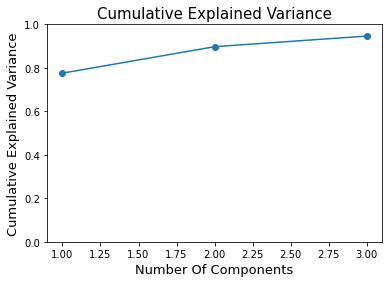

In [7]:
# Plot the cumulative explained variance graph
plt.plot(range(1, pca.n_components + 1), np.cumsum(pca.explained_variance_ratio_), '-o')
plt.title('Cumulative Explained Variance', fontsize = 15)
plt.xlabel('Number Of Components', fontsize = 13)
plt.ylabel('Cumulative Explained Variance', fontsize = 13)
plt.tick_params(labelsize = 10)
plt.ylim(0,1)

In [8]:
# Find the percent of the variance do the first 2 and 3 components describe
print('The first 2 components describe percent of the variance is:', (np.cumsum(pca.explained_variance_ratio_)[1]) * 100, '%')
print('The first 3 components describe percent of the variance is:', (np.cumsum(pca.explained_variance_ratio_)[2]) * 100, '%')

The first 2 components describe percent of the variance is: 89.73213663789889 %
The first 3 components describe percent of the variance is: 94.61598027980747 %


4. Plot the scores-loadings graph for PC1-PC2. Visualize the different sites with a differ-
ent colour or symbol.

In [13]:
def myplot(scores,loadings, loading_labels = None, score_labels = None):
    # adjusting the scores to fit in (-1,1)
    # first and second PC score
    xt = scores[:, 0]
    yt = scores[:, 1]
    # number of features
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    if score_labels is None:
        plt.scatter(scores[:,0],scores[:,1])
    else:
        for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T,score_labels):
            plt.text(x, y, label,ha = 'center', size = 14)
    
    for n in range(n):
        plt.arrow(0, 0, p_scaled[n,0], p_scaled[n,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[n,0], p_scaled[n,1], "Var"+str(n+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[n,0], p_scaled[n,1], loading_labels[n], color = 'r', ha = 'center', va = 'center', size = 14)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize = 18);
    plt.ylabel("PC{}".format(2), fontsize = 18);
    plt.tick_params(labelsize = 14)
    plt.grid()

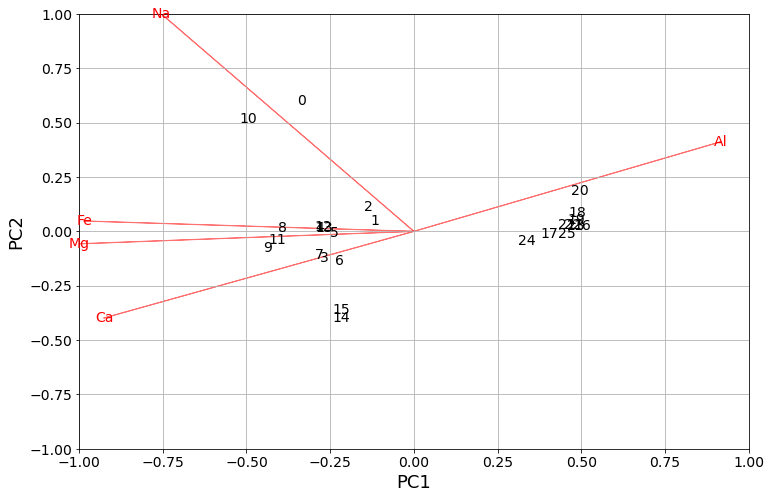

In [14]:
plt.rcParams["figure.figsize"] = [12, 8]
myplot(pca_scores[:,:2],loadings_pot.iloc[:, :2],loading_labels = loadings_pot.index, score_labels = scores_pot.index)

5. How does the map of scores-loadings explains the reason that your company uses the
raw material from Isle Thorns and Ashley Rails to manufacture Product B?

From the map above, we can clearly see that the samples for Isle Thorns and Ashley Rails are very close to each other, indicating that they have similar components and are in the right clusters. Since they both have Al, which is the raw materials of producing product B, they are used by the company to manufacture product B. 

6. Is the raw material from Caldicot a good replacement for Llanedyrn? Yes or no and
why?

No, the Calcicot’s raw material is not a good replacement for Llanedyrn. Even though the points of samples for both types are quite close to each other, the distance between Calcicot and Na, Fe, Mg, Ca is quite further than the distance between Llanedyrn and Na, Fe, Mg, Ca. This indicate that Calcicot’s raw material might not be qualified for producing Llanedyrn. 

7. What are the biggest differences in the two big clusters? How are the two samples from the candidate Caldicot different than the Llanedyrn samples?

The biggest difference between the two big clusters is the concentration level of the component elements. The right cluster mainly contains high-concentration AI and low-concentration Ca, Mg, Fe, and Na. While the left cluster mainly contains high-concentration Ca, Mg, Fe, Na, and low-concentration AI. The Ca from Caldicot is lower than the average level making it differ from Llanedyrn. 

8. Confirm the answers by producing the boxplot of the 5 variables grouped by the site of the raw material shown below.

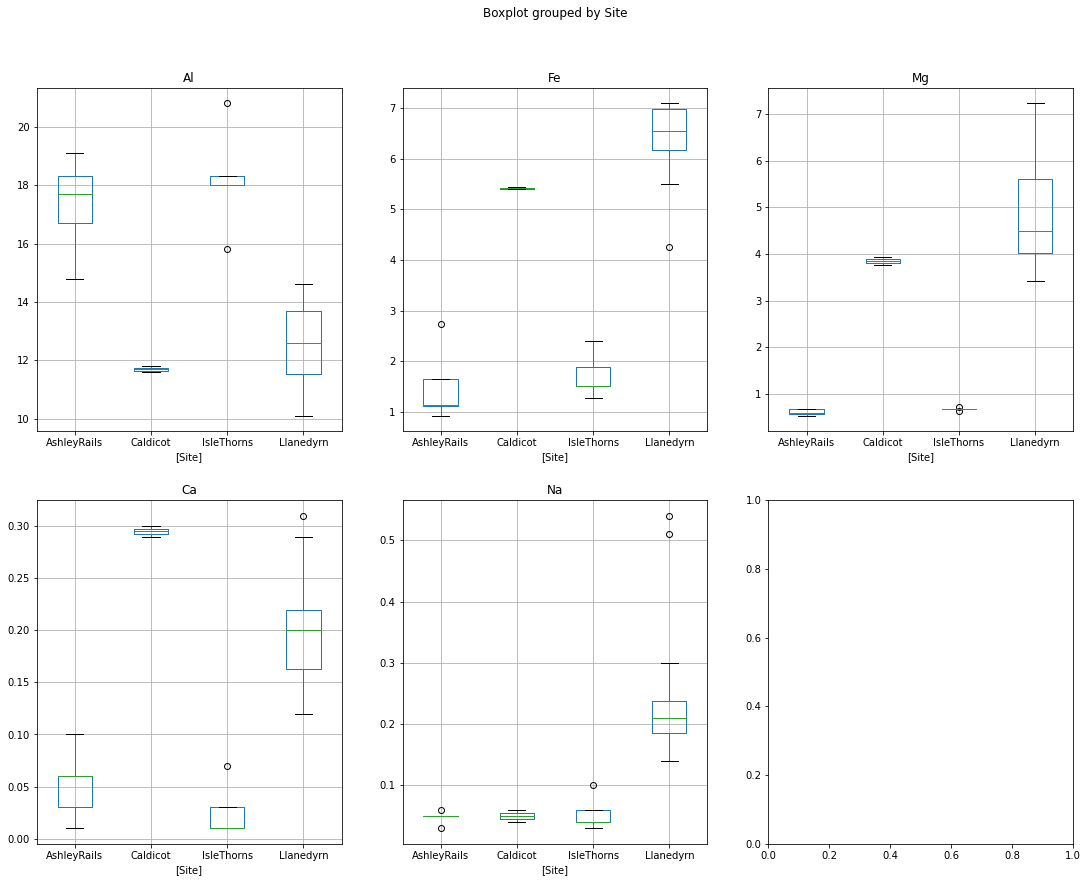

In [19]:
group = ['Al', 'Fe', 'Mg', 'Ca', 'Na']
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (18, 14))
for g in range(len(group)):
    if g >= 3:
        p[['Site', group[g]]].boxplot(by = 'Site', ax = axes[1, g - 3])
    else:
        p[['Site', group[g]]].boxplot(by = 'Site', ax = axes[0, g])